In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Input

In [59]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_test.shape

(10000, 28, 28)

In [62]:
y_train.shape

(60000,)

In [63]:
y_test.shape

(10000,)

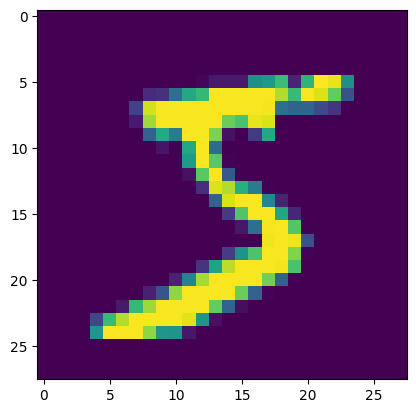

In [64]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

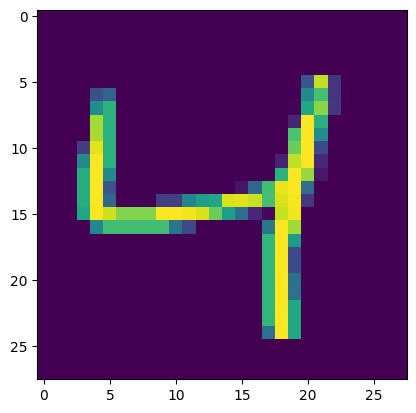

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [66]:
X_train=X_train/255
X_test=X_test/255

In [67]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
model = Sequential([
    Input(shape=(28, 28)),  # ✅ Correct Input layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Example for 10-class classification
])

In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [71]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4779 - val_loss: 0.1575
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1333 - val_loss: 0.1132
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0851 - val_loss: 0.1011
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0627 - val_loss: 0.0843
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0469 - val_loss: 0.1012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0358 - val_loss: 0.0912
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0292 - val_loss: 0.0900
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0221 - val_loss: 0.0865
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0164 - val_loss: 0.0908
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0161 - val_loss: 0.0957


In [72]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
y_prob

array([[8.77538525e-07, 1.10080274e-08, 3.16282240e-07, ...,
        9.99993443e-01, 7.19322157e-09, 3.13765270e-07],
       [4.28746379e-11, 1.72810876e-04, 9.99797046e-01, ...,
        8.55877072e-15, 2.20109341e-05, 8.06286982e-12],
       [3.40007250e-06, 9.98496294e-01, 2.34447652e-04, ...,
        4.69207560e-04, 7.14561844e-04, 1.06153259e-07],
       ...,
       [3.54302553e-16, 9.71582840e-13, 2.78832892e-13, ...,
        6.91442565e-08, 1.00744096e-07, 1.38190499e-05],
       [1.54860743e-13, 8.29954378e-13, 2.32729333e-18, ...,
        2.27376034e-13, 2.80176038e-09, 3.28547224e-15],
       [2.17402225e-11, 4.14894605e-17, 1.14214770e-10, ...,
        1.07898394e-14, 1.70787082e-12, 4.94458617e-15]], dtype=float32)

In [74]:
y_pred=y_prob.argmax(axis=1)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

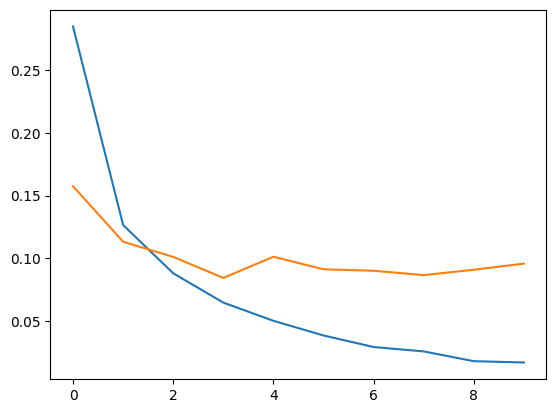

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

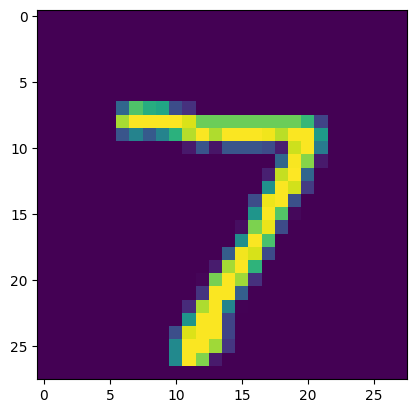

In [77]:
plt.imshow(X_test[0])

In [79]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([7])